<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), Data Scientist at Mail.ru Group <br>
    All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.
You may use this material for any purpose (you can edit, correct and use it as example) exept commercial use with mandatory citation of author.

# <center> Assignment #6 (demo).
## <center> Exploring Linear regression, Lasso and Random Forest in regression task
    
<img src="https://habrastorage.org/webt/-h/ns/aa/-hnsaaifymavmmudwip9imcmk58.jpeg" width="30%">

**Fill in the missing code and choose answers in [this](https://docs.google.com/forms/d/1aHyK58W6oQmNaqEfvpLTpo6Cb0-ntnvJ18rZcvclkvw/edit) web form.**

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

**We are working with UCI Wine quality dataset (no need to download it – it's already there, in course repo and in Kaggle Dataset).**

In [2]:
wines = pd.read_csv('../input/winequality-white.csv')
print(wines.shape)
wines.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Separate the target feature, split data in 7:3 proportion (30% of examples form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [4]:
X = wines.drop('quality', axis='columns')
y = wines['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((3428, 11), (1470, 11))

## Linear regression (without regularization)

**Train a simple linear regression model (Ordinary Least Squares).**

In [5]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**<font color='red'>Question 1:</font> What are mean squared errors of model predictions on train and test sets?**

In [6]:
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)
print('Mean squared error (train): {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Mean squared error (test): {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean squared error (train): 0.558
Mean squared error (test): 0.584


**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

**<font color='red'>Question 2:</font> Which feature this linear regression model treats as the most influential on wine quality?**

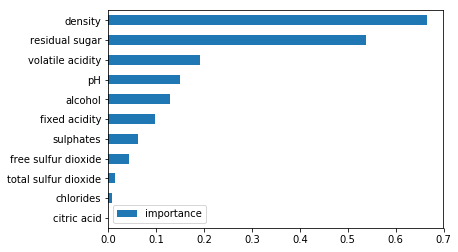

In [7]:
importances = pd.DataFrame(abs(linreg.coef_),
                           index=X.columns,
                           columns=['importance'])
importances.sort_values('importance').plot(kind='barh')

## Lasso (L1 regularization)

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [8]:
lasso = Lasso(alpha=0.01, random_state=17)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)

**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

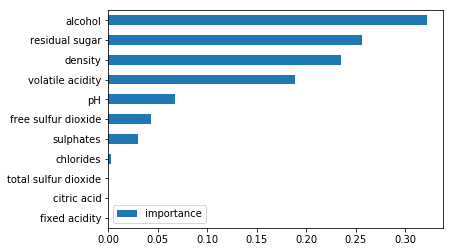

In [9]:
importances = pd.DataFrame(abs(lasso.coef_),
                           index=X.columns,
                           columns=['importance'])
importances.sort_values('importance').plot(kind='barh')

**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [10]:
alphas = np.logspace(-6, 2, 200)
print('[', min(alphas), max(alphas), ']')

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=17, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.alpha_    # alpha chosen by cross validation

[ 1e-06 100.0 ]


0.003783462617131929

**<font color='red'>Question 3:</font> Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

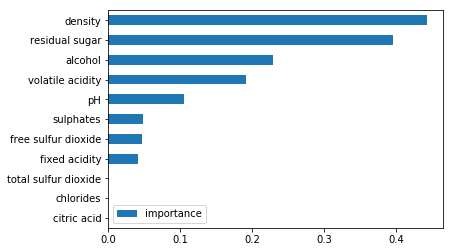

In [11]:
importances = pd.DataFrame(abs(lasso_cv.coef_),
                           index=X.columns,
                           columns=['importance'])
importances.sort_values('importance').plot(kind='barh')

**<font color='red'>Question 4:</font> What are mean squared errors of tuned LASSO predictions on train and test sets?**

In [12]:
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)
print('Mean squared error (train): {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Mean squared error (test): {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean squared error (train): 0.560
Mean squared error (test): 0.575


## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [13]:
forest = RandomForestRegressor(n_estimators=10, random_state=17)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

**<font color='red'>Question 5:</font> What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on test set?**

In [14]:
y_train_pred = forest.predict(X_train)
cv_scores = cross_val_score(forest, X_train, y_train,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
y_test_pred = forest.predict(X_test)
print('Mean squared error (train): {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Mean squared error (cv): {:.3f}'.format(abs(cv_scores).mean()))
print('Mean squared error (test): {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean squared error (train): 0.076
Mean squared error (cv): 0.455
Mean squared error (test): 0.422


**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on test set.**

In [15]:
%%time
forest_params = {'max_depth': range(10, 25), 
                 'min_samples_leaf': range(1, 8),
                 'max_features': range(6,12)}

locally_best_forest = GridSearchCV(forest, forest_params,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
locally_best_forest.fit(X_train, y_train)
print(abs(locally_best_forest.best_score_), locally_best_forest.best_params_)

0.4342389881618715 {'max_depth': 19, 'max_features': 7, 'min_samples_leaf': 1}
CPU times: user 9.62 s, sys: 951 ms, total: 10.6 s
Wall time: 2min 31s


**<font color='red'>Question 6:</font> What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on test set?**

In [16]:
cv_scores = cross_val_score(locally_best_forest.best_estimator_, X_train, y_train,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
y_test_pred = locally_best_forest.predict(X_test)
print('Mean squared error (cv): {:.3f}'.format(abs(cv_scores).mean()))
print('Mean squared error (test): {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean squared error (cv): 0.434
Mean squared error (test): 0.409


**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**<font color='red'>Question 7:</font> What is the most important feature, according to the Random Forest model?**

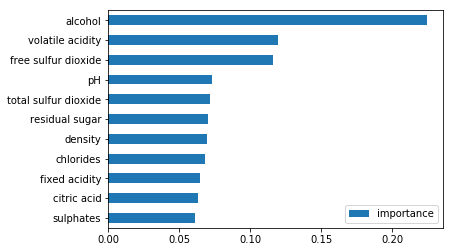

In [17]:
importances = pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_,
                           index=X.columns,
                           columns=['importance'])
importances.sort_values('importance').plot(kind='barh')